# <p style="text-align: center;">EE 380L: Data Mining</p>
# <p style="text-align: center;">Assignment 1</p>
## <p style="text-align: center;">Total points: 75 </p>
## <p style="text-align: center;">Due: **10th September 2020(09/10/2020)** submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UT eID for both students.

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)*

For the descriptive questions, you can write down the solution in paper and embed a picture of it to the notebook or type it out.

# Question 1: Challenges in Data Science (10 pts)

Refer to the Domino guide under Modules --> Additional Resources

Section 2 describes 8 Challenges. You may have personally encountered or heard of somebody else who encountered some of these challenge. If so, please write 1-2 paragraphs on what situation was encountered and how it mapped into one the mentioned challenges. If not, think of a hypothetical case and do the same exercise.

**Answer**

If we want to look into the relationship between the ice cream sales and the the number of people drowning swimming, we may get the conclusion that ice cream sales are proportional to the number of drowning swimming. It goes to the challenge of "Solve the wrong problem." Actually, when the temperature increases, ice cream sales and the number of drowning swimming both will increase accordingly. However, ice cream sales and the number of drowning swimming are independent to each other.

# Question 2: Guess the coin (5+5 points)


Assume we are playing a guessing game with a friend. The friend has three coins at hand:
* **Coin A**: a fair coin with equal probability of being head (H ) or tail (T)
* **Coin B**: a biased coin with a probability of 0.75 being head (H)
* **Coin C**: a coin with a probability of $P^*(H)$ being head (H)

The friend secretly picked one of the coins, randomly flipped it a few times, and get a sequence of *HTHHTT* (all of which come from the same coin he picked). 

1. If you had to choose between whether **Coin A** or **Coin B** was used, and you prefer the one which is more likely, which one will you choose?  (5 points)
2. What would be the value of  $P^*(H)$ such that **Coin C** corresponds to the most likely (among infinite possible coins) coin to have produced the observed sequence?(i.e. provide  an analytical derivation for $P^*(H)$ using maximum likelihood estimation (MLE))."

**Answer**

1. Choose Coin A. For Coin A, the likelihood to get HTHHTT is (1/2)^6. For Coin B, the likelihood is 27/4^6. The (1/2)^6 is larger.

2. The probability of getting a sequence of HTHHTT is P*(H)^3 * (1-P*(H))^3. Since the sequence shows a 50% probability of H, P*(H) should be 1/2 to get a maximum likelihood.

# Question 3: Bivariate Normal Distribution (20 pts)

Suppose $X$ and $Y$ are two random variables whose joint distribution is Normal (Gaussian), centered at (0,0) and with correlation $\rho$. (See "Bivariate Case" in the Wikipedia entry for "Multivariate Normal Distribution" for the equation, or use just use the vector form given in the class notes, with $\sigma_{12} = \sigma_{21} = \rho \sigma_{x} \sigma_{y} $). Consider 2 cases:
1. $\sigma_x^2 = 16; \sigma_y^2 = 9; \rho = 0$
2. $\sigma_x^2 = 16; \sigma_y^2 = 9; \rho = 0.5$

Sample 20000 points to obtain the contour plots for both the  cases.

a. (4 pts) Obtain contour plots for each of the two distributions using  Python (https://seaborn.pydata.org/generated/seaborn.kdeplot.html). 

b. (6 pts) View 3-D plots for the two distributions from at least two different viewing perspectives each (http://matplotlib.org/examples/mplot3d/rotate_axes3d_demo.html).

c.  (8 pts) Consider the bivariate Normal Distribution given in part (ii). We can rotate this distribution by using the rotation matrix
\begin{equation} \left[ \begin{array}{cc} \cos(\theta) & -\sin(\theta) \\ \sin(\theta) & \cos(\theta) \end{array} \right] \end{equation}
Check Wikipedia for more info on rotation matrices. This is the same as creating two new random variables:
\begin{aligned}
U = X \cos(\theta) - Y \sin(\theta) \\
V = X \sin(\theta) + Y \cos(\theta)
\end{aligned}
For a rotation of -45 degrees, plot the rotated distribution and fit a bivariate gaussian to this rotated distribution.



In [7]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import seaborn as sns; sns.set(color_codes=True)
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline

def Gaussian_Distribution(N = 2, M = 20000, m = 0):
    
    mean = np.zeros(N) + m
    cov_1 = np.array([[16, 0], [0, 9]])
    cov_2 = np.array([[16, 6], [6, 9]])
    
    data_1 = np.random.multivariate_normal(mean, cov_1, M)
    data_2 = np.random.multivariate_normal(mean, cov_2, M)
    
    Gaussian_1 = multivariate_normal(mean = mean, cov = cov_1)
    Gaussian_2 = multivariate_normal(mean = mean, cov = cov_2)
    
    return Gaussian_1, data_1, Gaussian_2, data_2

Gaussian_1, data_1, Gaussian_2, data_2 = Gaussian_Distribution()

Text(0.5, 1.0, 'Contour Plot for Case 2')

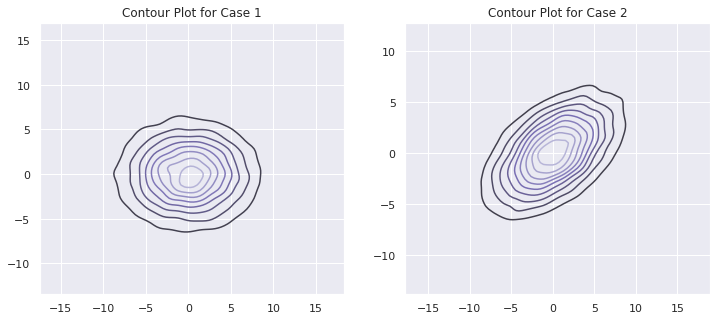

In [8]:
plt.figure(1, figsize = (12, 5))
ax_1 = plt.subplot(1, 2, 1)
x_1, y_1 = data_1.T
ax_1 = sns.kdeplot(x_1, y_1, cmap="Purples_d")
ax_1.set_title('Contour Plot for Case 1')

ax_2 = plt.subplot(1, 2, 2)
x_2, y_2 = data_2.T
ax_2 = sns.kdeplot(x_2, y_2, cmap="Purples_d")
ax_2.set_title('Contour Plot for Case 2')

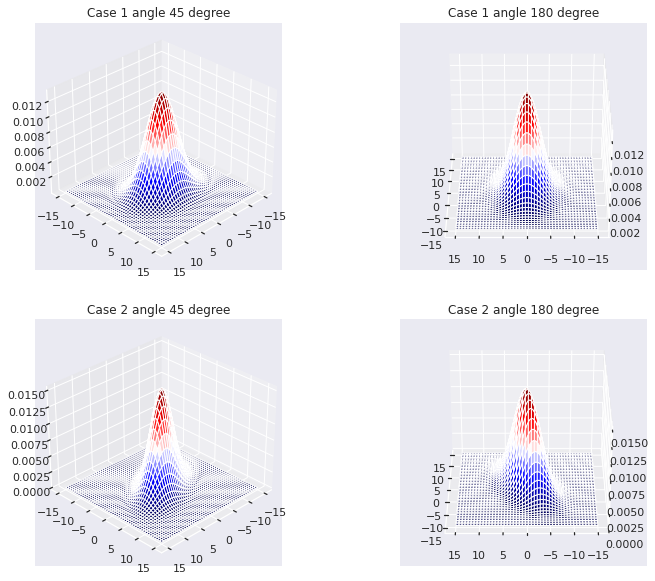

In [9]:
M = 142
fig = plt.figure(2, figsize = (12, 10))
ax_11 = fig.add_subplot(221, projection='3d')
ax_12 = fig.add_subplot(222, projection='3d')
X_1, Y_1 = np.meshgrid(np.linspace(-15, 15, M), np.linspace(-15, 15, M))
d = np.dstack([X_1, Y_1])
Z_1 = Gaussian_1.pdf(d).reshape(M, M)
ax_11.plot_surface(X_1, Y_1, Z_1, rstride=3, cstride=3, cmap='seismic')
ax_11.view_init(30, 45)
ax_11.set_title('Case 1 angle 45 degree')
plt.draw()
ax_12.plot_surface(X_1, Y_1, Z_1, rstride=3, cstride=3, cmap='seismic')
ax_12.view_init(30, 180)
ax_12.set_title('Case 1 angle 180 degree')
plt.draw()

ax_21 = fig.add_subplot(223, projection='3d')
ax_22 = fig.add_subplot(224, projection='3d')
X_2, Y_2 = np.meshgrid(np.linspace(-15, 15, M), np.linspace(-15, 15, M))
d = np.dstack([X_2, Y_2])
Z_2 = Gaussian_2.pdf(d).reshape(M, M)
ax_21.plot_surface(X_2, Y_2, Z_2, rstride=3, cstride=3, cmap='seismic')
ax_21.view_init(30, 45)
ax_21.set_title('Case 2 angle 45 degree')
plt.draw()
ax_22.plot_surface(X_2, Y_2, Z_2, rstride=3, cstride=3, cmap='seismic')
ax_22.view_init(30, 180)
ax_22.set_title('Case 2 angle 180 degree')
plt.draw()

Text(0.5, 1.0, 'Rotated Contour Plot for Case 2')

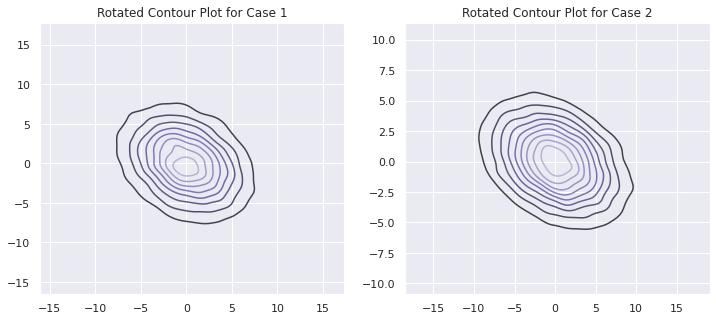

In [10]:
angle = math.radians(-45)
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
data_1r = np.dot(rotation_matrix, data_1.T)
data_2r = np.dot(rotation_matrix, data_2.T)

plt.figure(3, figsize = (12, 5))
ax_1r = plt.subplot(1, 2, 1)
ax_1r = sns.kdeplot(data_1r[0, :], data_1r[1, :], cmap="Purples_d")
ax_1r.set_title('Rotated Contour Plot for Case 1')
ax_1r = plt.subplot(1, 2, 2)
ax_2r = sns.kdeplot(data_2r[0, :], data_2r[1, :], cmap="Purples_d")
ax_2r.set_title('Rotated Contour Plot for Case 2')

In [14]:
new_mean_1 = np.mean(data_1r, axis=1)
new_mean_2 = np.mean(data_2r, axis=1)
new_cov_1 = np.cov(data_1r)
new_cov_2 = np.cov(data_2r)

print("New mean for Case 1: \n", new_mean_1)
print("New cov matrix for Case 1: \n", new_cov_1)
print("New mean for Case 2: \n", new_mean_2)
print("New cov matrix for Case 2: \n", new_cov_2)

New mean for Case 1: 
 [-0.01808522 -0.04172811]
New cov matrix for Case 1: 
 [[12.61679909 -3.61032506]
 [-3.61032506 12.62916856]]
New mean for Case 2: 
 [0.04211847 0.00483702]
New cov matrix for Case 2: 
 [[18.44716478 -3.42899472]
 [-3.42899472  6.42964533]]


# Question 4 (5 pts)
(i)What are the key assumptions regarding the relation between the dependent variable (Y) and the
independent variables (Xs) made in the standard (multiple) linear regression model?

(ii) Briefly describe how the residuals obtained from an MLR solution can be used to test some
assumption(s) made by this model.


**Answer**

(i) The conditional mean of Y is linear in the Xj variables. The error term are normally distributed, independent from each other and identically distributed.

(ii) If an MLR solution shows good fit, the residuals will have a constant variance, be approximately normally distributed with a mean of 0 and be independent of one another over time. This can be used to test the assumptions made in this model.




# Question 5: Multiple Linear Regression (30 pts + 5 pts bonus)

Use the following code to import the Fish market prices dataset in python. The dataset is taken from https://www.kaggle.com/aungpyaeap/fish-market.

1. Species: Species name of fish
2. Weight: Weight of fish in gram
3. Length1: Vertical length in cm
4. Length2: Diagonal length in cm
5. Length3: Cross length in cm
6. Height: Height in cm
7. Width: Diagonal width in cm



In [2]:
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None


df = pd.read_csv("data.csv", index_col=0)

df = df.fillna(0)

X = df.drop(['Weight'], axis=1)
y = df['Weight']


Consider the `Weight` column to be your target variable. You can ignore the species of the Fish for this regression problem(a to f).

a. (2 pts)  Print the shape (number of rows and columns) of the feature matrix X, and print the first 5 rows.

b. (6 pts) Using ordinary least squares, fit a multiple linear regression (MLR) on all the feature variables using the entire dataset. Report the regression coefficient of each input feature and evaluate the model using mean absolute error (MAE). Example of ordinary least squares in Python is shown in Section 1.1.1 of http://scikit-learn.org/stable/modules/linear_model.html.

c. (6 pts) Split the data into a training set and a test set, using the train_test_split with test_size = 0.25 and random_state = 50. Fit an MLR using the training set. Evaluate the trained model using the training set and the test set, respectively. Compare the two MAE values thus obtained. Report the $R^2$ value(coefficient of determination)(https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html) .

d. (5 pts) Calculate the pearson correlation matrix of the independent variables in the training set. Report the variables which have magnitude of correlation greater than 0.8 w.r.t the variable 'Length2'. Now, plot a pairplot based on Species column as seen in the 2nd plot [here](https://seaborn.pydata.org/generated/seaborn.pairplot.html). How does the pairplot validate your previous answer?

e. (6 pts) Plot the histogram of Y_train and see its distribution. Now take log of Y_train and plot its histogram. Now run regression again after taking log and compare the MAE. You need to do np.exp(predictions) to bring them back to original scale, and then calculate MAE and $R^2$. Explain the results.

f. (5 pts) Rank the features in descending order based on their significance. You might find this link to be helpful: http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html.

g. (Bonus question - 5 pts) Use the Species column for one-hot encoding and perform part c of this question. Explain your results.

In [5]:
#a
print(df.shape, "\n")
print(df.head())

(159, 6) 

         Weight  Length1  Length2  Length3   Height   Width
Species                                                    
Bream     242.0     23.2     25.4     30.0  11.5200  4.0200
Bream     290.0     24.0     26.3     31.2  12.4800  4.3056
Bream     340.0     23.9     26.5     31.1  12.3778  4.6961
Bream     363.0     26.3     29.0     33.5  12.7300  4.4555
Bream     430.0     26.5     29.0     34.0  12.4440  5.1340


In [6]:
#b
w = df['Weight']
v = df[['Length1', 'Length2', 'Length3', 'Height', 'Width']]

In [7]:
regr = linear_model.LinearRegression()

In [8]:
regr.fit(v, w)

LinearRegression()

In [9]:
regr.coef_

array([ 62.35521443,  -6.52675249, -29.02621861,  28.29735132,
        22.47330665])

In [10]:
w_pred = regr.predict(v)
mean_absolute_error(w, w_pred)

91.78724088307948

In [11]:
#c
from sklearn.model_selection import train_test_split

v_train, v_test, w_train, w_test = train_test_split(v, w, test_size=0.25, random_state=50)
regr2 = linear_model.LinearRegression()
regr2.fit(v_train, w_train)

LinearRegression()

In [12]:
w_train_pred = regr2.predict(v_train)
mean_absolute_error(w_train, w_train_pred)

84.82479753198542

In [13]:
w_test_pred = regr2.predict(v_test)
mean_absolute_error(w_test, w_test_pred)

101.89481945056988

In [14]:
from sklearn.metrics import r2_score

print(r2_score(w_train, w_train_pred))
print(r2_score(w_test, w_test_pred))

0.878916337517605
0.8919608385022908


In [15]:
#d
v_train.corr(method='pearson')

,Length1,Length2,Length3,Height,Width
Length1,1.000000,0.999399,0.990034,0.587997,0.845798
Length2,0.999399,1.000000,0.992702,0.606298,0.853645
Length3,0.990034,0.992702,1.000000,0.678908,0.858384
Height,0.587997,0.606298,0.678908,1.000000,0.766986
Width,0.845798,0.853645,0.858384,0.766986,1.000000


**Variables with magnitude of correlation greater than 0.8 w.r.t Length2: Length1, Length3 and Width**

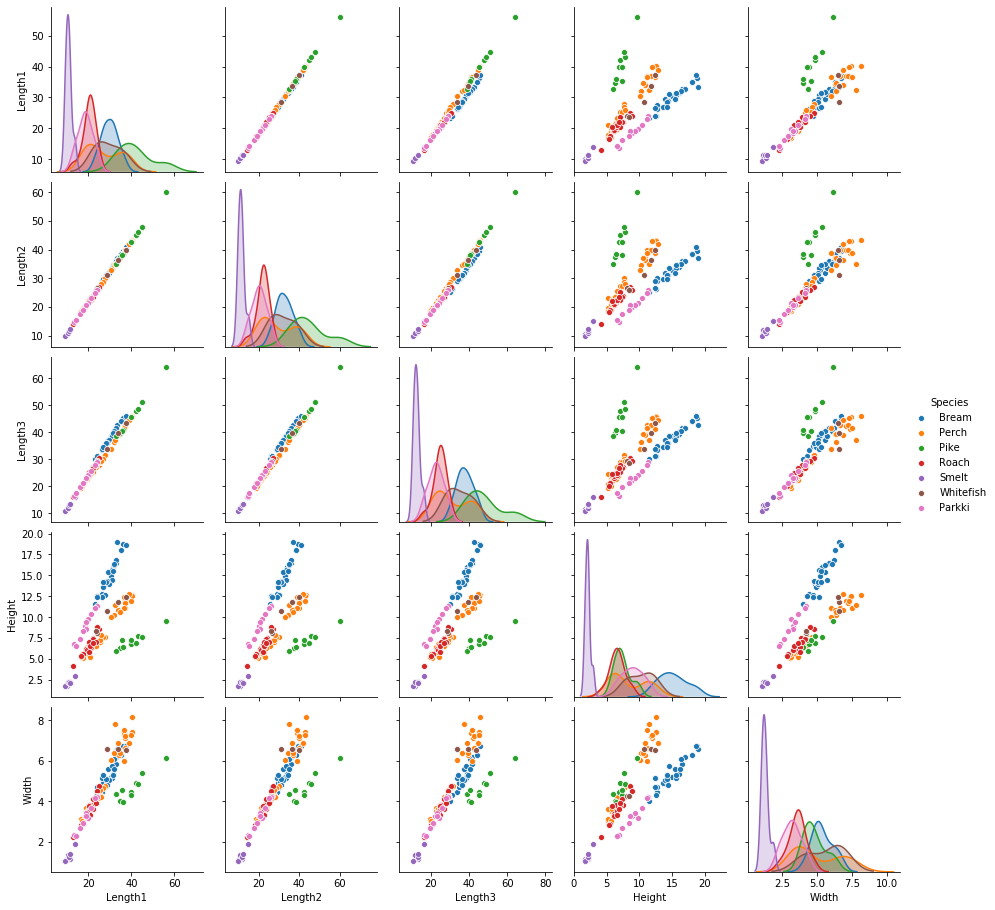

In [16]:
import seaborn as sns

v_train_reset = v_train.reset_index()
sns.pairplot(v_train_reset, hue="Species")

**Answer: The pairplot of Height and Length2 shows the worst linear relationship and from different color dots we can tell there are multiple linear relationships. The other parameters shows good linear relationships generally, which matches with the correlations of > 0.8.**

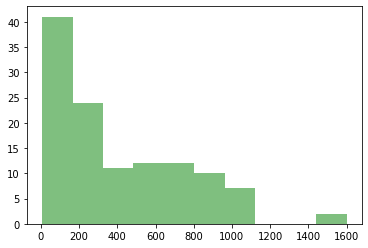

In [17]:
#e
import matplotlib.pyplot as plt

num_bins = 10
n, bins, patches = plt.hist(w_train, num_bins, facecolor='green', alpha=0.5)
plt.show()

In [18]:
w_train_log = np.log(w_train)

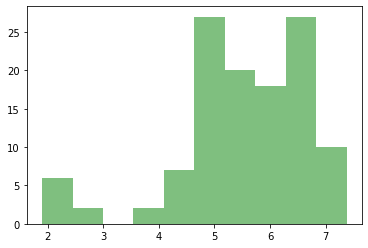

In [19]:
n, bins, patches = plt.hist(w_train_log, num_bins, facecolor='green', alpha=0.5)
plt.show()

In [20]:
regr3 = linear_model.LinearRegression()
regr3.fit(np.log(v_train), w_train_log)
w_train_pred3 = np.exp(regr3.predict(np.log(v_train)))
mean_absolute_error(w_train, w_train_pred3)

30.081391871409714

In [21]:
w_test_pred3 = np.exp(regr3.predict(np.log(v_test)))
mean_absolute_error(w_test, w_test_pred3)

35.5561264181524

In [22]:
print(r2_score(w_train, w_train_pred3))
print(r2_score(w_test, w_test_pred3))

0.9680909649893132
0.9801479269046288


**Explain: After doing log, the data distribution shows more linearity, which is good for the linear regression.**

In [23]:
#f
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=1, step=1)
selector = selector.fit(v, w)
selector.ranking_

array([1, 4, 5, 2, 3])

**The features in descending order based on their significance: Length1, Height, Width, Length2, Length3.**

In [24]:
#g
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

categorical_columns = ['Species']
preprocessor = make_column_transformer(
    (OneHotEncoder(), categorical_columns),
    remainder='passthrough'
)
regr4 = make_pipeline(
    preprocessor,
    linear_model.LinearRegression()
)

In [25]:
v_train_new = v_train.reset_index()
regr4.fit(v_train_new, w_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['Species'])])),
                ('linearregression', LinearRegression())])

In [26]:
w_train_pred4 = regr4.predict(v_train_new)
mean_absolute_error(w_train, w_train_pred4)

57.96404800546127

In [27]:
v_test_new = v_test.reset_index()
w_test_pred4 = regr4.predict(v_test_new)
mean_absolute_error(w_test, w_test_pred4)

89.20532755690009

In [28]:
print(r2_score(w_train, w_train_pred4))
print(r2_score(w_test, w_test_pred4))

0.9463762188356687
0.8885793687939454


**Explain: By doing one-hot encoding, the R^2 increases and more close to 1. It is because one-hot encoding process introduced 7 more variables, which brings more information in the linear regression. Also, it can be observed in the pairplot that dots with the same color show linearity within the color itself. This may also explain that if the species can be considered as number-type variables, more information can be introduced in the linear regression and the prediction can be more precise.**